# Generador de datasets

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
import string
import glob, os

In [111]:
def generador(filename, char, n):
    file = open(f'data/{filename}.txt', 'a')
    for _ in range(n):
        word = ''.join(random.choice(string.ascii_lowercase) for _ in range(random.randint(3, 9)))
        word = char + word
        file.write(word + '\n')
    file.close()

### Distribucion Uniforme

In [112]:
cant_palabras = 10000

char = 'a'
sumaUni = 0
for i in range(0,26):
    generador("uniforme",char, int(cant_palabras/26) )
    char = chr(ord(char) + 1)
    sumaUni += cant_palabras/26
print(sumaUni) 

with open('./data/uniforme.txt','r') as source:
    data = [ (random.random(), line) for line in source ]
data.sort()
with open('./data/uniformeRandomized.txt','w') as target:
    for _, line in data:
        target.write( line )

10000.000000000002


### Distribucion Normal

In [113]:
char = 'a'
suma =0 
for i in range(1,14):
    generador("normal",char, int(i*51.35))
    char = chr(ord(char) + 1)   
    suma += int(i*51.35) 
for i in range(14,1,-1):        
    generador("normal",char,int(i*51.35) )
    char = chr(ord(char) + 1)
    suma += int(i*51.35)
print(suma) 

with open('./data/normal.txt','r') as source:
    data = [ (random.random(), line) for line in source ]
data.sort()
with open('./data/normalRandomized.txt','w') as target:
    for _, line in data:
        target.write( line )

10001


### Distribucion Bernoulli

In [114]:
char = 'a'
sumaBer =0 
cant_palabras1 = 19500
cant_palabras2 = 500

for i in range(1,14):
    generador("bernoulli",char, int(cant_palabras1/26))
    char = chr(ord(char) + 1)   
    sumaBer += cant_palabras1/26
for i in range(14,1,-1):        
    generador("bernoulli",char, int(cant_palabras2/26))
    char = chr(ord(char) + 1)
    sumaBer += cant_palabras2/26
print(sumaBer) 

with open('./data/bernoulli.txt','r') as source:
    data = [ (random.random(), line) for line in source ]
data.sort()
with open('./data/bernoulliRandomized.txt','w') as target:
    for _, line in data:
        target.write( line )

10000.000000000004


### Ploteo distribuciones

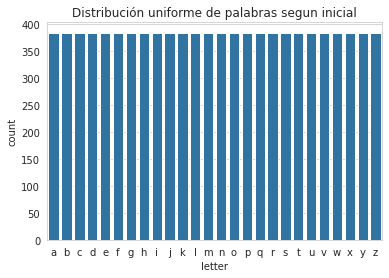

In [115]:
letter_count = {}
datasetPath = './data/uniforme.txt'

file = open(datasetPath, 'r')
for line in file:
    letter_count[line[0]] = letter_count.get(line[0],0) +1
    
df = pd.DataFrame(letter_count.items(), columns=['letter', 'count'])
df = df.sort_values(["letter"])
df.head()

sns.set_style("whitegrid")
ax = sns.barplot(data=df,x='letter', y='count', color="tab:blue")
ax.set_title("Distribución uniforme de palabras segun inicial")
fig = ax.get_figure()

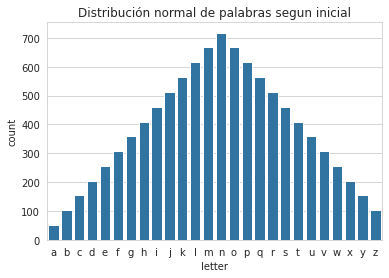

In [116]:
letter_count = {}
datasetPath = './data/normal.txt'

file = open(datasetPath, 'r')
for line in file:
    letter_count[line[0]] = letter_count.get(line[0],0) +1
    
df = pd.DataFrame(letter_count.items(), columns=['letter', 'count'])
df = df.sort_values(["letter"])
df.head()

sns.set_style("whitegrid")
ax = sns.barplot(data=df,x='letter', y='count', color="tab:blue")
ax.set_title("Distribución normal de palabras segun inicial")
fig = ax.get_figure()

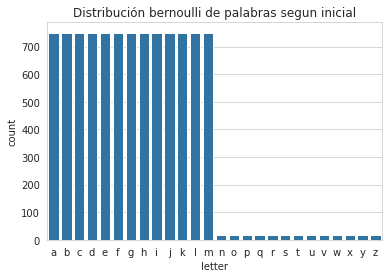

In [117]:
letter_count = {}
datasetPath = './data/bernoulli.txt'

file = open(datasetPath, 'r')
for line in file:
    letter_count[line[0]] = letter_count.get(line[0],0) +1
    
df = pd.DataFrame(letter_count.items(), columns=['letter', 'count'])
df = df.sort_values(["letter"])
df.head()

sns.set_style("whitegrid")
ax = sns.barplot(data=df,x='letter', y='count', color="tab:blue")
ax.set_title("Distribución bernoulli de palabras segun inicial")
fig = ax.get_figure()

### Distribucion uniforme multiple

In [92]:
cantArchivos = 30
cantPalabras = 150
for i in range(0,cantArchivos):
    char = 'a'
    sumaUni = 0
    for j in range(0,26):
        generador("incremental/uniforme"+str(i),char, int(cantPalabras/26) )
        char = chr(ord(char) + 1)
        sumaUni += cantPalabras/26
#print(sumaUni) 


for i in range(0,cantArchivos):
    with open('./data/incremental/uniforme' +str(i)+ '.txt','r') as source:
        data = [ (random.random(), line) for line in source ]
    data.sort()
    with open('./data/incrementalRand/uniformeRand' +str(i)+ '.txt','w') as target:
        for _, line in data:
            target.write( line )